In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

plt.rcParams["patch.force_edgecolor"] = True

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


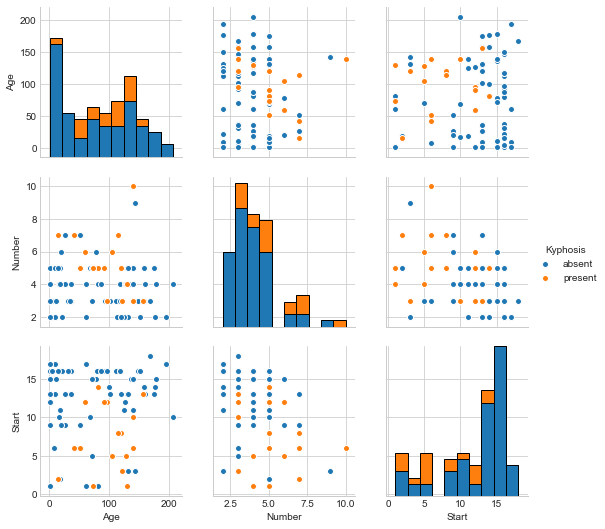

In [8]:
sns.pairplot(df, hue='Kyphosis')

In [9]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.3)

In [29]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
classifier = DecisionTreeClassifier()

In [31]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

             precision    recall  f1-score   support

     absent       0.78      0.90      0.84        20
    present       0.00      0.00      0.00         5

avg / total       0.63      0.72      0.67        25



[[18  2]
 [ 5  0]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
random_classifier = RandomForestClassifier(200)

In [37]:
random_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred_2 = random_classifier.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred_2))
print('\n')
print(confusion_matrix(y_test,y_pred_2))

             precision    recall  f1-score   support

     absent       0.79      0.95      0.86        20
    present       0.00      0.00      0.00         5

avg / total       0.63      0.76      0.69        25



[[19  1]
 [ 5  0]]
